## Does unbiased model coefficients imply that cross entropy is minimum?

In [1]:
%matplotlib inline
import math
import numpy as np
np.random.seed(22)

#### Experiment:
Suppose we have 1 input feature of gaussian distribution for both positive, and negative classes. The parameters of these distributions are $\mu_1 = 0.5$, $\sigma = 1$, and $\mu_0 = -0.5$, $\sigma = 1$ for +ve and -ve classes respectively.

The distributions are shown in the figure below:
<img src = "distributions.png">

In [93]:
def generate_samples(mu, sig, N):
    return np.random.normal(mu, sig, N)

mu0 = -0.5 #negative class instances distribution
mu1 = 0.5 #positive class instances distribution
sigma = 1 #standard deviation of both distributions

#### Optimal model:
Optimal model has $w = \frac{\mu_1 - \mu_0}{\sigma ^ 2} = 1$, $b = \frac{{\mu_1}^2 - {\mu_0}^2}{2\sigma ^ 2} = 0$

#### Our fitted models:
- Assume that we have two different models where the first one has coefficients $\hat{w_1} = 1 - \epsilon + \eta$ and the second model has coefficients $\hat{w_2} = 1 + \epsilon + \eta$ such that $\mathbb{E}(\hat{w}) = w $ at $\eta = 0$
- Let's define $\epsilon = 0.5$. So, $\hat{w_1} = 0.5$, $\hat{b_1} = 0$, and $\hat{w_2} = 1.5$, $\hat{b_2} = 0$

In [94]:
def generate_prediction(w, b, x):
    e = float(np.exp(-1.0 * w * x + b) )
    return 1.0/(1.0 + e )

In [95]:
#optimal model
w = (mu1 - mu0) / sigma
b = (mu1*mu1 - mu0 * mu0) / (2 * sigma)
#our fitted models
epsilon = 0.5
eta = 0
w1 = w - epsilon + eta
w2 = w + epsilon + eta
b1 = b
b2 = b

#### Generate instances = (N0, N1) from the defined distributions where N0 = number of -ve class instances and N1 = number of +ve class instances

In [96]:
N0 = 1e6; N1 = 1e6
S0 = generate_samples(mu0, sigma, int(N0))
S1 = generate_samples(mu1, sigma, int(N1))

##### Calculate Average Cross Entropy over all instances from the optimal model:

In [97]:
def compute_CE(S0, S2, w, b):
    CE = 0
    for i in S0:
        p = generate_prediction(w, b, i)
        #print(p)
        CE += -np.log2(1-p)
    for i in S1:
        p = generate_prediction(w, b, i)
        CE += -np.log2(p)
    return CE / (len(S0) + len(S1))

In [98]:
optimal_CE = compute_CE(S0, S1, w, b)
print('Cross Entropy from the Original LR:', optimal_CE) 

Cross Entropy from the Original LR: 0.8396085290374675


##### Calculate Expected Cross Entropy for the fitted models whose coefficients are different from optimal one:

In [99]:
expected_CE = (compute_CE(S0, S1, w1, b1) + compute_CE(S0, S1, w2, b2))/ 2
print('Expected Cross Entropy from the fitted models:', expected_CE)

Expected Cross Entropy from the fitted models: 0.8696880321329766


### Results Summary:
##### Experiment 1 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.9$, $\eta = 0.5$
- Expected Cross Entropy = 0.926, Original Cross Entropy = 0.8393

##### Experiment 2 (unbiased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.9$, $\eta = 0$
- Expected Cross Entropy = 0.939, Original Cross Entropy = 0.8393

##### Experiment 3 (unbiased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.1$, $\eta = 0$
- Expected Cross Entropy = 0.840, Original Cross Entropy = 0.8393

##### Experiment 4 (unbiased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0$
- Expected Cross Entropy = 0.8692, Original Cross Entropy = 0.8393

##### Experiment 5 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0.001$
- Expected Cross Entropy = 0.8692, Original Cross Entropy = 0.8393

##### Experiment 6 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0.01$
- Expected Cross Entropy = 0.8689, Original Cross Entropy = 0.8393

##### Experiment 7 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0.1$
- Expected Cross Entropy = 0.8676, Original Cross Entropy = 0.8393

##### Experiment 8 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0.2$
- Expected Cross Entropy = 0.8684, Original Cross Entropy = 0.8393

##### Experiment 8 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0.3$
- Expected Cross Entropy = 0.8713, Original Cross Entropy = 0.8393

##### Experiment 9 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0.4$
- Expected Cross Entropy = 0.8762, Original Cross Entropy = 0.8393

##### Experiment 10 (biased coefficients):
- N0 = N1 = 1e6
- $\epsilon = 0.5$, $\eta = 0.5$
- Expected Cross Entropy = 0.8829, Original Cross Entropy = 0.8393

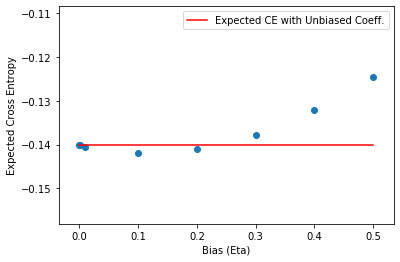

In [53]:
import matplotlib.pyplot as plt
xs = np.array([0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
ys = np.array([0.8692, 0.8692, 0.8689, 0.8676, 0.8684, 0.8713, 0.8762, 0.8829])
plt.scatter(xs, np.log(ys))
plt.plot([0, 0.5], [np.log(0.8692), np.log(0.8692)], color = 'r', label = 'Expected CE with Unbiased Coeff.')
plt.ylabel('Expected Cross Entropy')
plt.xlabel('Bias (Eta)')
plt.legend()
plt.show()


#### <font color = "red"> <b> Conclusion: </b> </font>
Unbiased Logistic Regression Model Coefficients doesn't imply minimum Cross Entropy.

## Analytical Proof:

$\mathbb{E}(CE(\hat{P}(x), Y) ) = \frac{1}{2N} \left( \sum_{i=1}^{N} -y_i log(\frac{1}{1 + e^{-0.5x_i}}) -(1 - y_i) log(1 - \frac{1}{1 + e^{-0.5x_i}}) -y_i log(\frac{1}{1 + e^{-1.5x_i}}) -(1 - y_i) log(1 - \frac{1}{1 + e^{-1.5x_i}}) \right)$

$ = \frac{1}{2N} \left( \sum_{i=1}^{N} -y_i log(\frac{1}{1 + e^{-0.5x_i} }) -(1 - y_i) log(\frac{e^{-0.5x_i} }{1 + e^{-0.5x_i} }) -y_i log(\frac{1}{1 + e^{-1.5x_i} }) -(1 - y_i) log(\frac{e^{-1.5x_i} }{1 + e^{-1.5x_i} }) \right)$

$ = \frac{1}{2N} \left( \sum_{i=1}^{N} -y_i log(\frac{1}{1 + e^{-0.5x_i} }) - log(\frac{e^{-0.5x_i} }{1 + e^{-0.5x_i} })  + y_i log(\frac{e^{-0.5x_i} }{1 + e^{-0.5x_i} }) -y_i log(\frac{1}{1 + e^{-1.5x_i} }) - log(\frac{e^{-1.5x_i} }{1 + e^{-1.5x_i} }) + y_i log(\frac{e^{-1.5x_i} }{1 + e^{-1.5x_i} }) \right)$

$ = \frac{1}{2N} \left( \sum_{i=1}^{N} y_i log(\frac{e^{-0.5x_i} }{1 + e^{-0.5x_i} } ({1 + e^{-0.5x_i}}) \frac{e^{-1.5x_i}}{1 + e^{-1.5x_i} } ({1 + e^{-1.5x_i} }) ) - log(\frac{e^{-0.5x_i} }{1 + e^{-0.5x_i} }) - log(\frac{e^{-1.5x_i} }{1 + e^{-1.5x_i} }) \right)$

$ = \frac{1}{2N} \left( \sum_{i=1}^{N} y_i log(e^{-2x_i}) - log(\frac{e^{-2x_i} }{(1 + e^{-0.5x_i}) (1 + e^{-1.5x_i})}) \right)$

$ = \frac{1}{N} \left( \sum_{i=1}^{N} y_i log(e^{-x_i}) - log(\frac{e^{-x_i} }{\sqrt{(1 + e^{-0.5x_i}) (1 + e^{-1.5x_i})}}) \right)$

$CE(P(x), Y) = \frac{1}{N} \left( \sum_{i=1}^{N} -y_i log(\frac{1}{1 + e^{-x_i}}) -(1 - y_i) log(1 - \frac{1}{1 + e^{-x_i}})  \right)$

$ = \frac{1}{N} \left( \sum_{i=1}^{N} -y_i log(\frac{1}{1 + e^{-x_i}}) - log(\frac{e^{-x_i}}{1 + e^{-x_i}}) + y_i log(\frac{e^{-x_i}}{1 + e^{-x_i}})  \right)$

$ = \frac{1}{N} \left( \sum_{i=1}^{N} y_i log(e^{-x_i}) - log(\frac{e^{-x_i} }{1 + e^{-x_i} }) \right)$

$\mathbb{E}(CE(\hat{P}(x), Y) ) - CE(P(x), Y) = \frac{1}{N} \left( \sum_{i=1}^{N} log(\frac{e^{-x_i} }{1 + e^{-x_i} }) - log(\frac{e^{-x_i} }{\sqrt{(1 + e^{-0.5x_i}) (1 + e^{-1.5x_i})}}) \right)$

$ =  \frac{1}{N} \sum_{i=1}^{N} log(\frac{\sqrt{(1 + e^{-0.5x_i}) (1 + e^{-1.5x_i})}} {1 + e^{-x_i}}) $

#### Plot the difference

In [60]:
x = np.linspace(-1.0, 1.0, num=1000)
y = []
for i in x:
    zz = np.sqrt((1.0 + float(np.exp(-0.5 * i)) ) * (1.0 + float(np.exp(-1.5 * i)) ))
    y.append (zz - (1.0 + float(np.exp(-i)) ) )

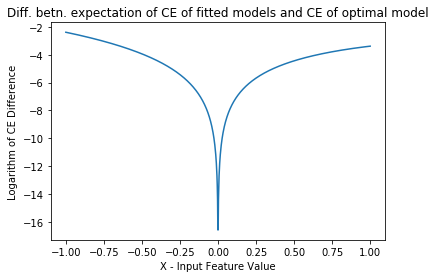

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, np.log(y))
plt.title('Diff. betn. expectation of CE of fitted models and CE of optimal model')
plt.xlabel('X - Input Feature Value')
plt.ylabel('Logarithm of CE Difference')
plt.savefig('difference.jpg')
plt.show()